In [295]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from itertools import combinations
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [296]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics-Job-Change/master/train_jqd04QH%20-%20train_jqd04QH.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics-Job-Change/master/test_KaymcHn%20-%20test_KaymcHn.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/HR-Analytics-Job-Change/master/sample_submission_sxfcbdx%20-%20sample_submission_sxfcbdx.csv')

In [297]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


In [298]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [299]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [300]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38


In [301]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15021 non-null  int64  
 1   city                    15021 non-null  object 
 2   city_development_index  15021 non-null  float64
 3   gender                  11633 non-null  object 
 4   relevent_experience     15021 non-null  object 
 5   enrolled_university     14742 non-null  object 
 6   education_level         14626 non-null  object 
 7   major_discipline        12628 non-null  object 
 8   experience              14977 non-null  object 
 9   company_size            10970 non-null  object 
 10  company_type            10691 non-null  object 
 11  last_new_job            14717 non-null  object 
 12  training_hours          15021 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [302]:
test.describe()

,enrollee_id,city_development_index,training_hours
count,15021.000000,15021.000000,15021.000000
mean,16643.004327,0.846683,65.158179
std,9626.895233,0.109709,59.719211
min,6.000000,0.448000,1.000000
25%,8316.000000,0.794000,23.000000
50%,16664.000000,0.910000,47.000000
75%,24908.000000,0.920000,89.000000
max,33378.000000,0.949000,336.000000


In [303]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
company_type,5039,0.274470
company_size,4779,0.260308
gender,4098,0.223215
major_discipline,2838,0.154584
education_level,457,0.024892
last_new_job,367,0.019990
enrolled_university,342,0.018628
experience,59,0.003214
target,0,0.000000
training_hours,0,0.000000


In [304]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
company_type,4330,0.288263
company_size,4051,0.269689
gender,3388,0.225551
major_discipline,2393,0.159310
education_level,395,0.026297
last_new_job,304,0.020238
enrolled_university,279,0.018574
experience,44,0.002929
training_hours,0,0.000000
relevent_experience,0,0.000000


In [305]:
# fill up missing values
train['company_type'] = train['company_type'].fillna(train['company_type'].mode()[0])
test['company_type'] = test['company_type'].fillna(test['company_type'].mode()[0])

train['company_size'] = train['company_size'].fillna(train['company_size'].mode()[0])
test['company_size'] = test['company_size'].fillna(test['company_size'].mode()[0])

train['gender'] = train['gender'].fillna(train['gender'].mode()[0])
test['gender'] = test['gender'].fillna(test['gender'].mode()[0])

train['major_discipline'] = train['major_discipline'].fillna(train['major_discipline'].mode()[0])
test['major_discipline'] = test['major_discipline'].fillna(test['major_discipline'].mode()[0])

train['education_level'] = train['education_level'].fillna(train['education_level'].mode()[0])
test['education_level'] = test['education_level'].fillna(test['education_level'].mode()[0])

train['last_new_job'] = train['last_new_job'].fillna(train['last_new_job'].mode()[0])
test['last_new_job'] = test['last_new_job'].fillna(test['last_new_job'].mode()[0])

train['enrolled_university'] = train['enrolled_university'].fillna(train['enrolled_university'].mode()[0])
test['enrolled_university'] = test['enrolled_university'].fillna(test['enrolled_university'].mode()[0])

train['experience'] = train['experience'].fillna(train['experience'].mode()[0])
test['experience'] = test['experience'].fillna(test['experience'].mode()[0])

In [306]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [307]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


In [308]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,1,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.762,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,STEM,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,1,38


In [309]:
train['city'] = train['city'].map(lambda x: x.lstrip('city_'))
test['city'] = test['city'].map(lambda x: x.lstrip('city_'))

train['experience'] = train['experience'].map(lambda x: x.lstrip('<'))
test['experience'] = test['experience'].map(lambda x: x.lstrip('<'))

train['experience'] = train['experience'].map(lambda x: x.lstrip('>'))
test['experience'] = test['experience'].map(lambda x: x.lstrip('>'))

train['last_new_job'] = train['last_new_job'].map(lambda x: x.lstrip('>'))
test['last_new_job'] = test['last_new_job'].map(lambda x: x.lstrip('>'))

train['last_new_job'] = train['last_new_job'].map(lambda x: x.lstrip('<'))
test['last_new_job'] = test['last_new_job'].map(lambda x: x.lstrip('<'))

In [310]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,8,50-99,Pvt Ltd,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10/49,Pvt Ltd,3,41,0


In [311]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,33,0.448,Male,No relevent experience,Full time course,Graduate,STEM,1,1000-4999,Public Sector,1,15
1,12036,28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,20,50-99,Pvt Ltd,1,94
2,11061,103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,1,17
3,5032,104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,20,50-99,Pvt Ltd,2,76
4,17599,77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,46,0.762,Male,Has relevent experience,no_enrollment,Masters,STEM,20,500-999,Pvt Ltd,4,68
15017,14612,21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,16,0.910,Male,Has relevent experience,no_enrollment,High School,STEM,9,1000-4999,Pvt Ltd,4,13
15019,14506,64,0.666,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,1,38


In [312]:
enrollee=train.groupby('enrollee_id')['target'].sum().reset_index()
enrollee

,enrollee_id,target
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
18354,33375,0
18355,33376,0
18356,33377,0
18357,33379,0


In [313]:
city=train.groupby('city')['target'].sum().reset_index()
city

,city,target
0,1,2
1,10,9
2,100,44
3,101,8
4,102,36
...,...,...
118,93,3
119,94,3
120,97,6
121,98,7


In [314]:
develop=train.groupby('city_development_index')['target'].sum().reset_index()
develop

,city_development_index,target
0,0.448,7
1,0.479,5
2,0.487,3
3,0.493,3
4,0.512,1
...,...,...
88,0.924,21
89,0.925,21
90,0.926,136
91,0.939,48


In [315]:
sex=train.groupby('gender')['target'].sum().reset_index()
sex

,gender,target
0,Female,179
1,Male,2217
2,Other,29


In [316]:
sex1={'Female':0, 'Male':1, 'Other':2}
train.gender=train.gender.map(sex1)
test.gender=test.gender.map(sex1)

In [317]:
exp=train.groupby('relevent_experience')['target'].sum().reset_index()
exp

,relevent_experience,target
0,Has relevent experience,1594
1,No relevent experience,831


In [318]:
exp1={'No relevent experience':0, 'Has relevent experience':1}
train.relevent_experience=train.relevent_experience.map(exp1)
test.relevent_experience=test.relevent_experience.map(exp1)

In [319]:
uni=train.groupby('enrolled_university')['target'].sum().reset_index()
uni

,enrolled_university,target
0,Full time course,607
1,Part time course,174
2,no_enrollment,1644


In [320]:
uni1={'no_enrollment':0, 'Part time course':1, 'Full time course': 2}
train.enrolled_university=train.enrolled_university.map(uni1)
test.enrolled_university=test.enrolled_university.map(uni1)

In [321]:
ed=train.groupby('education_level')['target'].sum().reset_index()
ed

,education_level,target
0,Graduate,1593
1,High School,241
2,Masters,513
3,Phd,53
4,Primary School,25


In [322]:
ed1={'Primary School':0, 'High School':1, 'Graduate': 2, 'Masters': 3, 'PhD': 4}
train.education_level=train.education_level.map(ed1)
test.education_level=test.education_level.map(ed1)

In [323]:
disc=train.groupby('major_discipline')['target'].sum().reset_index()
disc

,major_discipline,target
0,Arts,25
1,Business Degree,39
2,Humanities,93
3,No Major,20
4,Other,37
5,STEM,2211


In [324]:
disc1={'No Major':0, 'Arts':1, 'Business Degree': 2, 'Humanities': 3, 'STEM': 4, 'Other': 5}
train.major_discipline=train.major_discipline.map(disc1)
test.major_discipline=test.major_discipline.map(disc1)

In [325]:
size=train.groupby('company_size')['target'].sum().reset_index()
size

,company_size,target
0,10/49,197
1,100-500,280
2,1000-4999,153
3,10000+,247
4,50-99,1223
5,500-999,105
6,5000-9999,74
7,<10,146


In [326]:
size1={'<10':0, '10/49':1, '50-99': 2, '100-500': 3, '500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7}
train.company_size=train.company_size.map(size1)
test.company_size=test.company_size.map(size1)

In [327]:
type=train.groupby('company_type')['target'].sum().reset_index()
type

,company_type,target
0,Early Stage Startup,74
1,Funded Startup,96
2,NGO,69
3,Other,19
4,Public Sector,152
5,Pvt Ltd,2015


In [328]:
type1={'Early Stage Startup':0, 'Funded Startup':1, 'NGO': 2, 'Public Sector': 3, 'Pvt Ltd': 4, 'Other': 5}
train.company_type=train.company_type.map(type1)
test.company_type=test.company_type.map(type1)

In [329]:
job=train.groupby('last_new_job')['target'].sum().reset_index()
job

,last_new_job,target
0,1,1088
1,2,389
2,3,130
3,4,508
4,never,310


In [330]:
job1={'never':0, '1':1, '2': 2, '3': 3, '4': 4}
train.last_new_job=train.last_new_job.map(job1)
test.last_new_job=test.last_new_job.map(job1)

In [331]:
hours=train.groupby('training_hours')['target'].sum().reset_index()
hours

,training_hours,target
0,1,1
1,2,12
2,3,21
3,4,24
4,5,10
...,...,...
236,328,1
237,330,0
238,332,4
239,334,2


In [332]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
education_level,459,0.025001
target,0,0.000000
training_hours,0,0.000000


In [333]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
education_level,422,0.028094
training_hours,0,0.000000
last_new_job,0,0.000000


In [334]:
train['education_level'] = train['education_level'].fillna(train['education_level'].mode()[0])
test['education_level'] = test['education_level'].fillna(test['education_level'].mode()[0])

In [335]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [336]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,149,0.689,1,1,0,2.0,4,3,3,4,1,106,0
1,29166,83,0.923,1,1,0,2.0,4,14,0,1,1,69,0
2,46,16,0.910,1,1,0,2.0,4,6,2,3,2,4,0
3,18527,64,0.666,1,1,0,2.0,4,14,2,4,1,26,0
4,21751,100,0.887,1,0,0,3.0,4,8,2,4,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,103,0.920,1,1,2,2.0,4,5,0,4,1,71,0
18355,25545,160,0.920,1,0,0,2.0,3,15,2,4,1,160,0
18356,11514,114,0.926,1,1,0,3.0,4,11,2,4,3,18,0
18357,1689,75,0.939,1,1,0,2.0,4,20,1,4,3,41,0


In [337]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,33,0.448,1,0,2,2.0,4,1,5,3,1,15
1,12036,28,0.939,1,0,0,2.0,4,20,2,4,1,94
2,11061,103,0.920,1,0,2,2.0,4,3,2,4,1,17
3,5032,104,0.924,1,0,0,2.0,4,20,2,4,2,76
4,17599,77,0.830,1,1,0,2.0,4,6,0,4,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,46,0.762,1,1,0,3.0,4,20,4,4,4,68
15017,14612,21,0.624,1,1,2,3.0,4,4,5,4,1,320
15018,33346,16,0.910,1,1,0,1.0,4,9,5,4,4,13
15019,14506,64,0.666,1,0,2,2.0,4,5,2,4,1,38


In [338]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level           float64
major_discipline            int64
experience                 object
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

In [339]:
test.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level           float64
major_discipline            int64
experience                 object
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
dtype: object

In [340]:
train['city']=pd.to_numeric(train['city'], errors='coerce')
test['city']=pd.to_numeric(test['city'], errors='coerce')

train['experience']=pd.to_numeric(train['experience'], errors='coerce')
test['experience']=pd.to_numeric(test['experience'], errors='coerce')

In [341]:
train.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level           float64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
target                      int64
dtype: object

In [342]:
test.dtypes

enrollee_id                 int64
city                        int64
city_development_index    float64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level           float64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
training_hours              int64
dtype: object

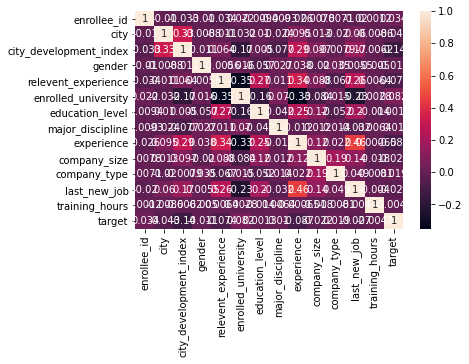

In [343]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

In [344]:
#prepare data
y = train["target"]
features = ["city", "city_development_index", "gender","relevent_experience","enrolled_university", "education_level", "major_discipline",
            "experience", "company_size", "company_type", "last_new_job", "training_hours" ]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [345]:
X

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,149,0.689,1,1,0,2.0,4,3,3,4,1,106
1,83,0.923,1,1,0,2.0,4,14,0,1,1,69
2,16,0.910,1,1,0,2.0,4,6,2,3,2,4
3,64,0.666,1,1,0,2.0,4,14,2,4,1,26
4,100,0.887,1,0,0,3.0,4,8,2,4,2,88
...,...,...,...,...,...,...,...,...,...,...,...,...
18354,103,0.920,1,1,2,2.0,4,5,0,4,1,71
18355,160,0.920,1,0,0,2.0,3,15,2,4,1,160
18356,114,0.926,1,1,0,3.0,4,11,2,4,3,18
18357,75,0.939,1,1,0,2.0,4,20,1,4,3,41


In [346]:
X_test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,33,0.448,1,0,2,2.0,4,1,5,3,1,15
1,28,0.939,1,0,0,2.0,4,20,2,4,1,94
2,103,0.920,1,0,2,2.0,4,3,2,4,1,17
3,104,0.924,1,0,0,2.0,4,20,2,4,2,76
4,77,0.830,1,1,0,2.0,4,6,0,4,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...
15016,46,0.762,1,1,0,3.0,4,20,4,4,4,68
15017,21,0.624,1,1,2,3.0,4,4,5,4,1,320
15018,16,0.910,1,1,0,1.0,4,9,5,4,4,13
15019,64,0.666,1,0,2,2.0,4,5,2,4,1,38


In [347]:
#split train set for testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
#bring all features to the same range
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_validation=sc_X.transform(X_validation)

In [348]:
model= XGBClassifier()
name='XGB'

In [349]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

XGB: 0.867093 (0.000746)


In [350]:
# Make predictions on validation dataset
model = XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)
model.fit(X, y)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, model.predict(X))
print(auc(false_positive_rate, true_positive_rate))

0.6020227769445871


In [351]:
print(roc_auc_score(y, model.predict(X)))

0.6020227769445871


In [352]:
predictions = model.predict(X_test)

In [353]:
output = pd.DataFrame({'enrollee_id': test.enrollee_id, 'target': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [354]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,enrollee_id,target
0,16548,1
1,12036,0
2,11061,1
3,5032,0
4,17599,0
...,...,...
15016,11308,0
15017,14612,1
15018,33346,0
15019,14506,0
